In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
file= r"C:\Users\ASUS\Desktop\adm.xlsx"
df= pd.read_excel(file)
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
df['Research'].value_counts()

Research
1    280
0    220
Name: count, dtype: int64

In [17]:
df2=df.drop(columns=['Serial No.'])
df2

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [21]:
x= df2.iloc[:,0:-1]
y=df2.iloc[:,-1]
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [22]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2,random_state=1)


In [23]:
from sklearn.preprocessing import MinMaxScaler 
sc=MinMaxScaler()
x_train_scaled= sc.fit_transform(x_train)
x_test_scaled= sc.transform(x_test)


In [24]:
import tensorflow  
from tensorflow import keras
from tensorflow.keras import Sequential 
from  keras.layers import Dense 


In [25]:
model= Sequential()
model.add(Dense(7, activation='relu',input_dim=7))
model.add(Dense(7, activation='relu'))
model.add(Dense(1,activation='linear'))


C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(loss="mean_squared_error",optimizer="Adam")


In [30]:
history=model.fit(x_train_scaled,y_train, epochs=100,validation_split=0.2) 
history

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.3954 - val_loss: 0.3207
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2762 - val_loss: 0.2238
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1907 - val_loss: 0.1439
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1172 - val_loss: 0.0898
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0639 - val_loss: 0.0663
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0525 - val_loss: 0.0616
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0481 - val_loss: 0.0593
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0495 - val_loss: 0.0548
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0413 - val_loss: 0.0508
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0376 - val_loss: 0.0472
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0364 - val_loss: 0.0439
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.

In [32]:
y_pred=model.predict(x_test_scaled)
y_pred

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


array([[0.6323718 ],
       [0.68440175],
       [0.97048914],
       [0.6873963 ],
       [0.8260009 ],
       [0.64046896],
       [0.73105514],
       [0.7615731 ],
       [0.76390195],
       [0.68725157],
       [0.65690863],
       [0.54454386],
       [0.8277508 ],
       [0.7835225 ],
       [0.7515483 ],
       [0.8853822 ],
       [0.64474404],
       [0.74184525],
       [0.9087169 ],
       [0.6764351 ],
       [0.6116432 ],
       [0.7832153 ],
       [0.846926  ],
       [0.6258054 ],
       [0.81117046],
       [0.58855677],
       [0.947472  ],
       [0.65444994],
       [0.84488285],
       [0.6707519 ],
       [0.6459471 ],
       [0.784019  ],
       [0.5883895 ],
       [0.89510524],
       [0.5655611 ],
       [0.78650117],
       [0.67303216],
       [0.62528634],
       [0.64933515],
       [0.8937651 ],
       [0.576929  ],
       [0.669485  ],
       [0.8131012 ],
       [0.96710527],
       [0.7627559 ],
       [0.4381197 ],
       [0.65540147],
       [0.666

In [34]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.7207139247938357

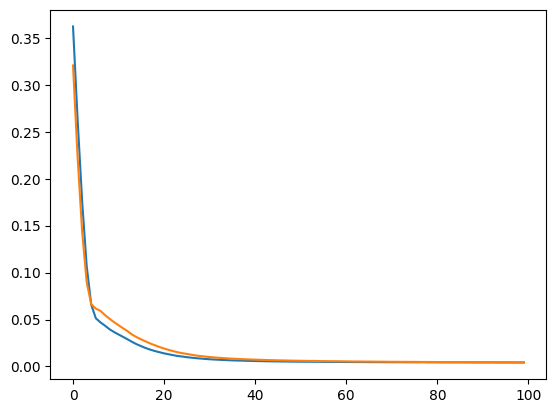

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
